In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.signal as signal
import audio2numpy as a2n

# check this out
# https://users.cs.utah.edu/~rajeev/pubs/ispass19.pdf

In [2]:
x, sr = a2n.audio_from_file('data/yt_1.mp3')
x = x[:,0]
t = np.linspace(0, len(x)/sr, len(x))

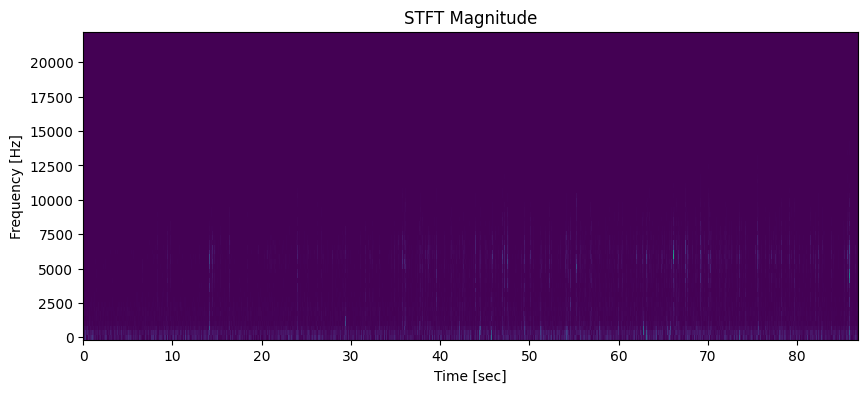

In [3]:
nperseg = 128
stft_f, stft_t, stft_zxx = signal.stft(x, fs=sr, nperseg=nperseg)

# show spectrogram
plt.figure(figsize=(10, 4))
plt.pcolormesh(stft_t, stft_f, np.abs(stft_zxx))
plt.title('STFT Magnitude')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

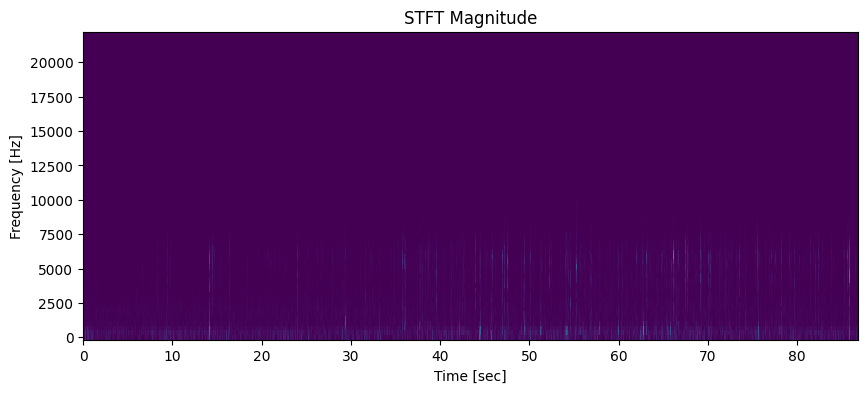

In [4]:
f0 = 200
f1 = 6000

filter_coefs = signal.butter(3, (f0, f1), btype='bandpass', fs=sr, output='sos')
xf = signal.sosfilt(filter_coefs, x)

stft_f_f, stft_t_f, stft_zxx_f = signal.stft(xf, fs=sr, nperseg=nperseg)

fig, ax = plt.subplots(figsize=(10, 4))
ax.pcolormesh(stft_t_f, stft_f_f, np.abs(stft_zxx_f))
ax.set_title('STFT Magnitude')
ax.set_ylabel('Frequency [Hz]')
ax.set_xlabel('Time [sec]')
plt.show()

In [14]:
base_t = (0, 6)
effect_w = 0.1
data = pd.Series(xf, index=t)

def effect(data: pd.Series) -> float:
    t_diff = data.index[-1] - data.index[0]
    return (data.abs() ** 2).sum() / t_diff

In [13]:
e_base = data.loc[base_t[0]:base_t[1]].pipe(effect)
data.rolling

1.7901429879637547